# Assignment 2:
    test if the distribution of ages is the same for 
    
    1) male and female riders
    
    2) day and night riders
    
    use 3 tests: KS, Pearson's, Spearman's. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a significant threshold for the whole eercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [130]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
#imports downloader
from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# I am reading in data from January 2015. It would be a good idea to use data from warmer months, since there are more riders in the warm weather and the more data the smaller the STATISTICAL NOISE. You should use data from multiple months, joining multiple datasets, thus addressing systematic errors as well

In [131]:
datestrings = ['201501', '201504', '201508', '201511', '201603', '201605']
dataframes = []
for datestring in datestrings:
    getCitiBikeCSV(datestring)
    df_name = 'df_' + datestring
    df_name = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
    dataframes.append(df_name)


file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [132]:
df = pd.concat(dataframes, axis = 0, copy = False)
df1 = df


In [133]:
df.dropna(inplace = True) #drop na in birthyear before converting to datetime to reduce processing time
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,4.573421e+06,4.573421e+06,4.573421e+06,4.573421e+06,4.573421e+06,4.573421e+06,4.573421e+06,4.573421e+06,4.573421e+06,4.573421e+06
mean,8.252396e+02,7.035284e+02,4.073660e+01,-7.398847e+01,6.926634e+02,4.073605e+01,-7.398817e+01,1.968649e+04,1.976777e+03,1.231565e+00
std,7.053717e+03,8.582459e+02,2.058628e-02,1.452367e-02,8.455194e+02,1.046100e-01,1.868804e-01,2.961278e+03,1.161738e+01,4.258850e-01
min,6.000000e+01,7.200000e+01,4.064677e+01,-7.401713e+01,7.200000e+01,0.000000e+00,-7.405950e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.610000e+02,3.180000e+02,4.072217e+01,-7.399851e+01,3.170000e+02,4.072217e+01,-7.399884e+01,1.712000e+04,1.969000e+03,1.000000e+00
50%,5.720000e+02,4.380000e+02,4.073782e+01,-7.398990e+01,4.350000e+02,4.073705e+01,-7.399003e+01,1.965000e+04,1.979000e+03,1.000000e+00
75%,9.230000e+02,5.090000e+02,4.075140e+01,-7.398042e+01,5.070000e+02,4.075098e+01,-7.398054e+01,2.242300e+04,1.986000e+03,1.000000e+00
max,5.864661e+06,3.255000e+03,4.078721e+01,-7.392989e+01,3.255000e+03,4.078721e+01,0.000000e+00,2.540900e+04,2.000000e+03,2.000000e+00


In [134]:
# df is the dataframe where the content of the csv file is stored
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 

#extracts time from starttime column for extra credit
df['time'] = pd.to_datetime(df['starttime']).dt.time

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,00:05:00


In [135]:
df.reset_index(drop = True, inplace = True)

# BY GENDER
splitting data by gender and extracting the age happens in the cell below

In [136]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time,ageM,ageF
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,00:01:00,NaN,55.0
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,00:02:00,52.0,NaN
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,00:04:00,41.0,NaN
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,00:04:00,46.0,NaN
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,00:05:00,38.0,NaN


In [137]:
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype'], axis = 1, inplace = True)
#dropping some data I no longer need
#... your code here...


df.head()

,birth year,gender,time,ageM,ageF
0,1960.0,2,00:01:00,NaN,55.0
1,1963.0,1,00:02:00,52.0,NaN
2,1974.0,1,00:04:00,41.0,NaN
3,1969.0,1,00:04:00,46.0,NaN
4,1977.0,1,00:05:00,38.0,NaN


In [139]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df['ageM'].dropna(inplace= True)
df['ageF'].dropna(inplace= True)
df.head()

,birth year,gender,time,ageM,ageF
0,1960.0,2,00:01:00,NaN,55.0
1,1963.0,1,00:02:00,52.0,NaN
2,1974.0,1,00:04:00,41.0,NaN
3,1969.0,1,00:04:00,46.0,NaN
4,1977.0,1,00:05:00,38.0,NaN


In [140]:
# dropping NaN values

lets split age in 10 year bins. the dataset is very large, so i could be split in smaller bins, but I will chose 10 years in the interest of time. 
the bin size choice should be a balance between properly sample the age space, have enough counts in each bin that the statistical noise is not significant (remember that is > sqrt(N)!) and the computational requirement to computatinal facilities ratio. 

the next several steps are needed if you want to code up the KS test from scratch. that is for extra credit, so if you do not want to do it you may not need to plot split the distribution in bins and create the cumulative HOWEVER it is a great idea to do it anyways to explore your data viaually! remember Ascombe's quartet!!

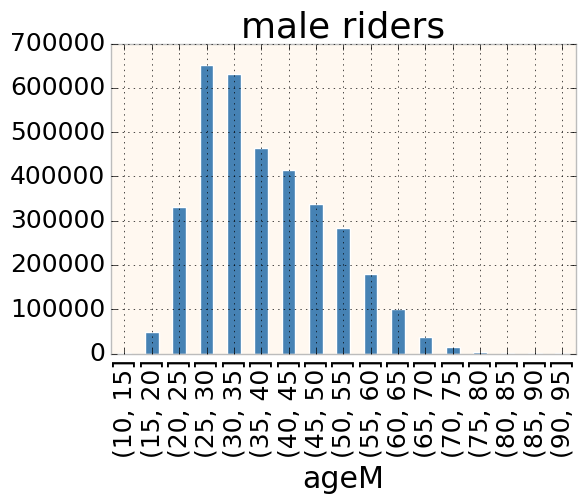

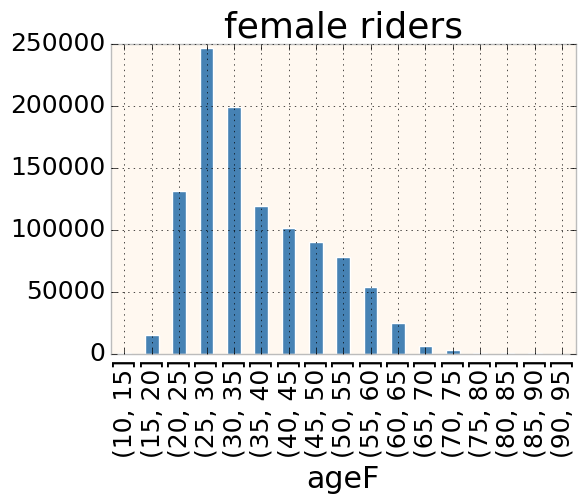

In [141]:
# plotting histogramswith pandas is a bitdifferent than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axM.set_title("male riders")
axF = df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axF.set_title("female riders")


# Figure 1: histogrammed distribution of riders' ages by gender

this is how the cumulative distributions look like.  Notice that i am normalizing them! if i want to reat an observed distribution like a probablility distribution i have to normalize it

          count_nonzero
ageM                   
(10, 15]       0.000032
(15, 20]       0.000019
(20, 25]       0.028757
(25, 30]       0.073619
(30, 35]       0.079277
(35, 40]       0.058058
(40, 45]       0.033890
(45, 50]       0.021738
(50, 55]       0.013372
(55, 60]       0.012343
(60, 65]       0.006708
(65, 70]       0.001571
(70, 75]       0.000351
(75, 80]       0.000132
(80, 85]       0.000047
(85, 90]       0.000023
(90, 95]       0.000000


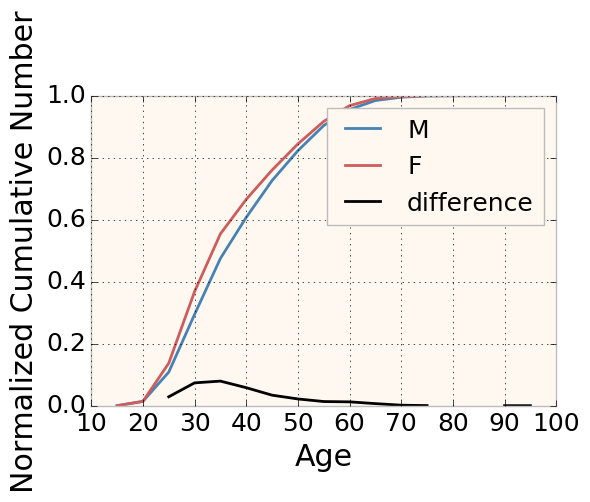

In [142]:
#print df.ageS, df.ageS.cumsum()

csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()

csF=df.ageF.groupby(pd.cut(df.ageF, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csM / csM.max()-csF / csF.max()))

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csF / csF.max(), label = "F")
pl.plot(bins[:-1] + 5, np.sqrt(csF / csF.max() - csM / csM.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

# Figure 2: the cumulative distribution of CitiBike riders' ages by gender

They look similar! But the difference gets to 10%. If I wanted to code the KS test by hand I woud have everything I need: the normalized cumulative distributions can be subtracted from each other and the max distance can calculated. 

Notice that there may be NaN values you are gonna have to deal with! 
You can do that for example with a Boolean statementsuch as  df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...

lets run the scipy KS test

In [143]:
import scipy.stats

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html


In [170]:
ks = scipy.stats.ks_2samp(df[df.gender == 1].ageM, df[df.gender == 2].ageF)
print (ks)

Ks_2sampResult(statistic=0.081226704959715235, pvalue=0.0)


# FILL IN THE CELL BELOW!

## The Null hypothesis: there is no difference between age of men and age of women who use citibike. 

$H_0: P_0 - P_1 \neq 0$ at $\alpha = 0.05$



## this cell is for you to tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS
## to do that refer to the scipy documentation to understand the output of the scipy.stats.ks_2samp function




The KS test return a statistic of 0.08122 and a p value of 0.0. The statistic represents supremum of the subset. In this instance, all distances between the normalized ages of female and male ridership  are smaller than .08122. Based on the p-value of 0.0, we can reject a null hypothersis at the $/alpha = 0.05$ level

The scipy.stats KS test already tells me the significance and the p-value. 

The next few cells are here just to show you how you would obtain the same result by hand, but they are **not required**. 

Remember: the Null hypothesis is rejected if 

$D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! 

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [145]:
#here is the critical values tablel. Have you chosen your significance level yet?? you should do it first thing!
from IPython.display import Image
#Image(filename="../plotsforclasses/ks2sample_table.png")

# Now redo the test with a subsample of the data: take only 1 ride every of 200 

In [162]:
df.describe()
sample = df.sample(frac = 1/200, random_state = 100)
ks2 = scipy.stats.ks_2samp(sample[sample.gender == 1].ageM, sample[sample.gender == 2].ageF)
print (ks2)
## your words here!...
## this cell is for you to redo the test with reducted dataset 
## and tell me what the scipy KS test returned and what it means in terms of NULL HYPOTHESIS

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


Ks_2sampResult(statistic=0.078607136986938109, pvalue=1.3767262597999641e-22)


#### The KS test return a statistic of 0.0786 and a p value approaching 0.00. The statistic represents supremum of the subset. In this instance, all distances between the normalized ages of female and male ridership  are smaller than .0786.  Based on the p-value under 0.05, we can reject the null hypothesis that there is no difference between ages of male and female citibike riders

# Pearson's  test for correlation

## notice that the Pearson's is a pairwise test: the samples need to be 
## a. sorted and 
## b. the same size!

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [171]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis

all_m = df[(df.gender == 1)]
all_f = df[(df.gender == 2)]

sample_m = all_m.sample(n = 20000, random_state = 100)
sample_f = all_f.sample(n = 20000, random_state = 100)
sample_m_sorted = sample_m.sort_values('ageM')
sample_f_sorted = sample_f.sort_values('ageF')
pearsonr = scipy.stats.pearsonr(sample_m_sorted.ageM, sample_f_sorted.ageF)

pearsonr

(0.99669559720798184, 0.0)

The pearson's R correlation coefficient is .9970 with a p-value of 0.0. Therefore, we can reject the null hypothesis that there is no correlation between the two datasets at the $\alpha = 0.05$ level

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [148]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

spearman = scipy.stats.spearmanr(sample_m_sorted.ageM, sample_f_sorted.ageF)
spearman

SpearmanrResult(correlation=0.9990104012793114, pvalue=0.0)

Spearman returns a correlation of 0.999010 and a p-value of 0.0. Therefore is a strong positive correlation between these two datasets. We can again reject the null hypothesis at the $\alpha = 0.05$ level

## please comment on the numbers that you get in the light of the scipy manual: what is rerutned? what does it mean??

## EXTRA CREDIT:  CHOOSE ONE OF THE TESTS, AND TEST THE CORRELATION OF AGES  OF RIDERS DURING THE DAY VS DURING THE NIGHT!



In [149]:
# define day as 5am - 5pm, night as 5pm-5am


In [150]:
day_start = datetime.time(5)
day_end = datetime.time(17)
night_rider = pd.concat([df[df.time < day_start], df[df.time >= day_end]])
day_rider_1 = df[df.time >= day_start]
day_rider = day_rider_1[day_rider_1.time < day_end]

In [151]:
sample_day = day_rider.sample(n = 20000, random_state = 100)
sample_night = night_rider.sample(n = 20000, random_state = 100)
sample_day_sorted = sample_day.sort_values('birth year')
sample_night_sorted = sample_night.sort_values('birth year')
pearsonr = scipy.stats.pearsonr(sample_day_sorted['birth year'], sample_night_sorted['birth year'])

pearsonr


(0.99565608350480939, 0.0)

The age of citibikers by day v. evening is also highly correlated with an R value of .9956 and a p-value of 0, which suggests a very small probability that uncorrelated data could have achieved a result as extreme as this.

          count_nonzero
age                    
(10, 15]   5.002501e-05
(15, 20]   1.302783e-03
(20, 25]   3.163592e-02
(25, 30]   6.963804e-02
(30, 35]   8.932677e-02
(35, 40]   8.554394e-02
(40, 45]   7.050205e-02
(45, 50]   4.805274e-02
(50, 55]   3.095450e-02
(55, 60]   1.520271e-02
(60, 65]   7.002030e-03
(65, 70]   2.100577e-03
(70, 75]   7.002826e-04
(75, 80]   5.001000e-05
(80, 85]   7.508632e-09
(85, 90]   5.003252e-05
(90, 95]   0.000000e+00


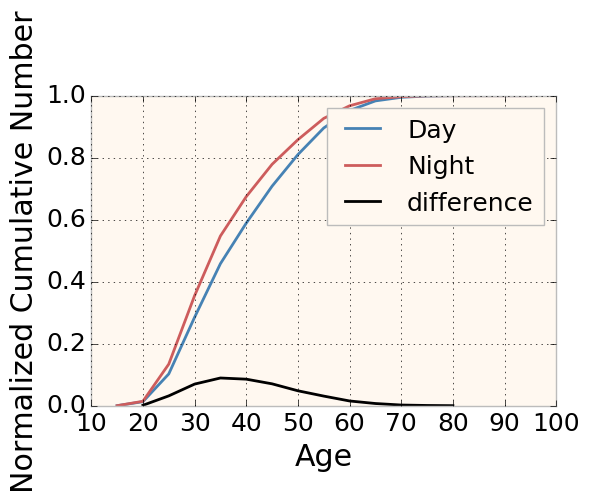

In [168]:
sample_day['age'] = 2015 - sample_day['birth year']
sample_night['age'] = 2015 - sample_night['birth year']
csD=sample_day.age.groupby(pd.cut(sample_day.age, bins)).agg([count_nonzero]).cumsum()

csN=sample_night.age.groupby(pd.cut(sample_night.age, bins)).agg([count_nonzero]).cumsum()


print (np.abs(csD / csD.max()-csN / csN.max()))

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "Day")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "Night")
pl.plot(bins[:-1] + 5, np.sqrt(csN / csN.max() - csD / csD.max())**2, 'k-',
        label = "difference")
pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

pl.xlabel("Age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

## Figure 3 The normalized distribution of Citibike rider's age by night v. day riding where day is defined as 5am-5pm.